#Wisata di Kota Batu Malang Dataset 4x Lipat

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


In [2]:
df = pd.read_excel("Datasetx4.xlsx")
df

,jenis_kelamin,umur,pekerjaan,hobi,tujuan_berwisata,status_perkawinan,daerah_asal,teman_perjalanan,pendidikan_terakhir,repetition,...,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14
0,Laki-Laki,12-25 tahun,Pelajar/Mahasiswa,Olahraga,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Pasangan,SMA/SMK,Pernah,...,1,0,0,0,0,0,0,0,0,0
1,Perempuan,12-25 tahun,Wiraswasta,Traveling,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Teman,SMA/SMK,Belum Pernah,...,1,0,0,1,0,0,0,0,0,0
2,Perempuan,12-25 tahun,Pelajar/Mahasiswa,Traveling,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Keluarga,SMA/SMK,Pernah,...,1,1,0,1,0,0,0,1,0,0
3,Perempuan,12-25 tahun,Pelajar/Mahasiswa,Traveling,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Teman,SMA/SMK,Belum Pernah,...,1,1,0,1,0,1,0,0,0,0
4,Laki-Laki,12-25 tahun,Pelajar/Mahasiswa,Olahraga,Rekreasi/Liburan,Belum Menikah,Luar Kota Batu,Teman,SMA/SMK,Pernah,...,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,Perempuan,26-45 tahun,Lainnya,Traveling,Rekreasi/Liburan,Menikah,Kota Batu,Keluarga,S1/D1/D2/D3,Pernah,...,1,0,1,0,0,0,0,0,0,0
904,Laki-Laki,26-45 tahun,Lainnya,Berenang,Rekreasi/Liburan,Menikah,Kota Batu,Keluarga,SMA/SMK,Pernah,...,0,1,0,0,0,0,0,0,0,0
905,Laki-Laki,26-45 tahun,Wiraswasta,Traveling,Rekreasi/Liburan,Menikah,Kota Batu,Pasangan,S1/D1/D2/D3,Pernah,...,0,0,0,0,0,0,0,0,0,1
906,Laki-Laki,26-45 tahun,Wiraswasta,Traveling,Rekreasi/Liburan,Menikah,Kota Batu,Keluarga,S1/D1/D2/D3,Pernah,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   jenis_kelamin        908 non-null    object
 1   umur                 908 non-null    object
 2   pekerjaan            908 non-null    object
 3   hobi                 908 non-null    object
 4   tujuan_berwisata     908 non-null    object
 5   status_perkawinan    908 non-null    object
 6   daerah_asal          908 non-null    object
 7   teman_perjalanan     908 non-null    object
 8   pendidikan_terakhir  908 non-null    object
 9   repetition           908 non-null    object
 10  Y1                   908 non-null    int64 
 11  Y2                   908 non-null    int64 
 12  Y3                   908 non-null    int64 
 13  Y4                   908 non-null    int64 
 14  Y5                   908 non-null    int64 
 15  Y6                   908 non-null    int64 
 16  Y7      

Dari info diatas, tidak ada keberadaan missing value / NaN.

In [4]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(include=['int64']).columns)

Memisahkan kolom yang bertipe objek (category) dengan yang numeric (eg. float,int, dll)

In [5]:
df[cats].describe()

,jenis_kelamin,umur,pekerjaan,hobi,tujuan_berwisata,status_perkawinan,daerah_asal,teman_perjalanan,pendidikan_terakhir,repetition
count,908,908,908,908,908,908,908,908,908,908
unique,2,4,4,5,4,2,2,5,4,2
top,Perempuan,12-25 tahun,Pelajar/Mahasiswa,Traveling,Rekreasi/Liburan,Belum Menikah,Kota Batu,Keluarga,SMA/SMK,Pernah
freq,576,560,364,452,860,568,460,460,608,548


In [6]:
df[nums].describe()

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,0.612335,0.638767,0.568282,0.502203,0.511013,0.374449,0.286344,0.54185,0.140969,0.268722,0.193833,0.171806,0.105727,0.083700
std,0.487486,0.480623,0.495589,0.500271,0.500154,0.484247,0.452301,0.49852,0.348182,0.443540,0.395517,0.377420,0.307657,0.277091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# cek data duplikat

df.duplicated().sum()

683

##Mulai tahapan membuat model ML

###1. Mengubah tipe data string ke dalam label numeric agar lebih mudah dipahami ML

In [8]:
for col in cats:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,jenis_kelamin,umur,pekerjaan,hobi,tujuan_berwisata,status_perkawinan,daerah_asal,teman_perjalanan,pendidikan_terakhir,repetition,...,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14
0,0,0,2,3,3,0,1,1,2,1,...,1,0,0,0,0,0,0,0,0,0
1,1,0,3,4,3,0,1,4,2,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,2,4,3,0,1,0,2,1,...,1,1,0,1,0,0,0,1,0,0
3,1,0,2,4,3,0,1,4,2,0,...,1,1,0,1,0,1,0,0,0,0
4,0,0,2,3,3,0,1,4,2,1,...,0,1,1,1,0,0,0,0,0,0


###2. Memisahkan antara fitur dan target

In [10]:
X = df[cats]
y = df[nums]

###3. Memisahkan data training dan testing set (sebesar 80% training, 20% testing)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###4. Scaling fitur umur menjadi numeric

In [12]:
num_cols = ['umur']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [13]:
num_categories = [len(df[col].unique()) for col in cats]

###5. Model algoritma NCF

In [14]:
def create_ncf_model(num_categories, latent_dim, hidden_dim):
    input_layers = []
    embedding_layers = []

    for num in num_categories:
        input_layer = Input(shape=(1,))
        embedding_layer = Embedding(num, latent_dim)(input_layer)
        flatten_layer = Flatten()(embedding_layer)
        input_layers.append(input_layer)
        embedding_layers.append(flatten_layer)

    repetition_input = Input(shape=(1,))
    repetition_embedding = Embedding(num_categories[-1], latent_dim)(repetition_input)
    repetition_flatten = Flatten()(repetition_embedding)
    embedding_layers.append(repetition_flatten)

    concat = Concatenate()(embedding_layers)
    x = Dense(hidden_dim, activation='relu')(concat)
    x = Dropout(0.2)(x)
    x = Dense(hidden_dim, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(14, activation='sigmoid')(x)

    model = Model(inputs=input_layers + [repetition_input], outputs=output)
    return model

###6. Membuat model

In [15]:
latent_dim = 20
hidden_dim = 50

model = create_ncf_model(num_categories, latent_dim, hidden_dim)

In [16]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

###7. Mulai training model

In [17]:
history = model.fit([X_train[col] for col in cats] + [X_train['repetition']],
                    y_train, batch_size=64, epochs=50,
                    validation_data=([X_test[col] for col in cats] + [X_test['repetition']], y_test),
                    verbose=1)

Epoch 1/50
12/12 [==============================] - 8s 167ms/step - loss: 0.6787 - accuracy: 0.0813 - val_loss: 0.6559 - val_accuracy: 0.2143
Epoch 2/50
12/12 [==============================] - 0s 42ms/step - loss: 0.6385 - accuracy: 0.1198 - val_loss: 0.6149 - val_accuracy: 0.2088
Epoch 3/50
12/12 [==============================] - 0s 36ms/step - loss: 0.6079 - accuracy: 0.1529 - val_loss: 0.5881 - val_accuracy: 0.2088
Epoch 4/50
12/12 [==============================] - 0s 38ms/step - loss: 0.5918 - accuracy: 0.1928 - val_loss: 0.5765 - val_accuracy: 0.2088
Epoch 5/50
12/12 [==============================] - 0s 42ms/step - loss: 0.5814 - accuracy: 0.2052 - val_loss: 0.5704 - val_accuracy: 0.2088
Epoch 6/50
12/12 [==============================] - 0s 24ms/step - loss: 0.5788 - accuracy: 0.2466 - val_loss: 0.5673 - val_accuracy: 0.2088
Epoch 7/50
12/12 [==============================] - 0s 34ms/step - loss: 0.5731 - accuracy: 0.2686 - val_loss: 0.5650 - val_accuracy: 0.2088
Epoch 8/50
1

In [18]:
loss, accuracy = model.evaluate([X_test[col] for col in cats] + [X_test['repetition']], y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

6/6 [==============================] - 0s 7ms/step - loss: 0.5305 - accuracy: 0.3407
Accuracy: 34.07%


####Compile model dengan metric MAE dan RMSE

In [19]:
model.compile(
    loss = 'mean_squared_error',
    optimizer = Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
)

In [20]:
history = model.fit([X_train[col] for col in cats] + [X_train['repetition']],
                    y_train, batch_size=64, epochs=50,
                    validation_data=([X_test[col] for col in cats] + [X_test['repetition']], y_test),
                    verbose=1)

Epoch 1/50
12/12 [==============================] - 8s 67ms/step - loss: 0.1752 - mean_absolute_error: 0.3545 - root_mean_squared_error: 0.4186 - val_loss: 0.1780 - val_mean_absolute_error: 0.3631 - val_root_mean_squared_error: 0.4219
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 0.1747 - mean_absolute_error: 0.3567 - root_mean_squared_error: 0.4180 - val_loss: 0.1776 - val_mean_absolute_error: 0.3603 - val_root_mean_squared_error: 0.4214
Epoch 3/50
12/12 [==============================] - 0s 13ms/step - loss: 0.1742 - mean_absolute_error: 0.3559 - root_mean_squared_error: 0.4173 - val_loss: 0.1772 - val_mean_absolute_error: 0.3583 - val_root_mean_squared_error: 0.4209
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.1719 - mean_absolute_error: 0.3510 - root_mean_squared_error: 0.4146 - val_loss: 0.1765 - val_mean_absolute_error: 0.3558 - val_root_mean_squared_error: 0.4202
Epoch 5/50
12/12 [==============================] - 0s 13ms/

In [21]:
loss, mae, rmse = model.evaluate([X_test[col] for col in cats] + [X_test['repetition']], y_test)

print(f'\nMAE: {mae}\n RMSE: {rmse}')

6/6 [==============================] - 0s 3ms/step - loss: 0.1484 - mean_absolute_error: 0.3058 - root_mean_squared_error: 0.3852

MAE: 0.30576834082603455
 RMSE: 0.385234534740448


<Axes: >

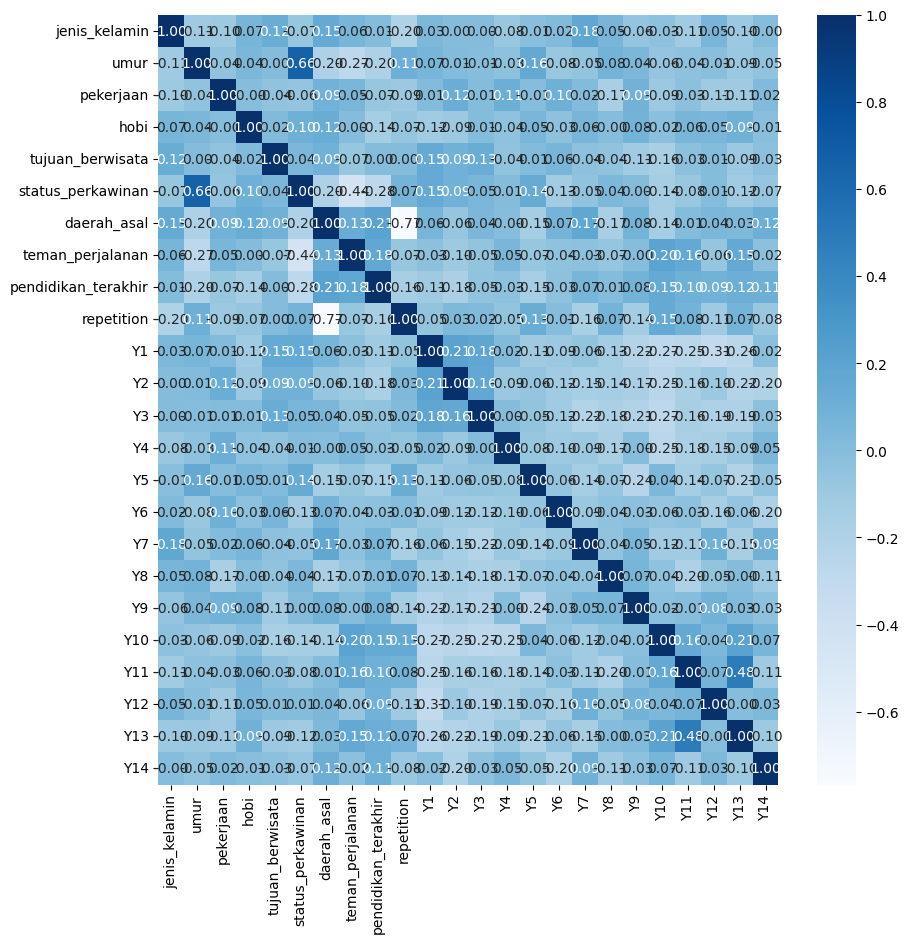

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dataset 4x